# _Why can't YouTubers keep their comments to themselves?_

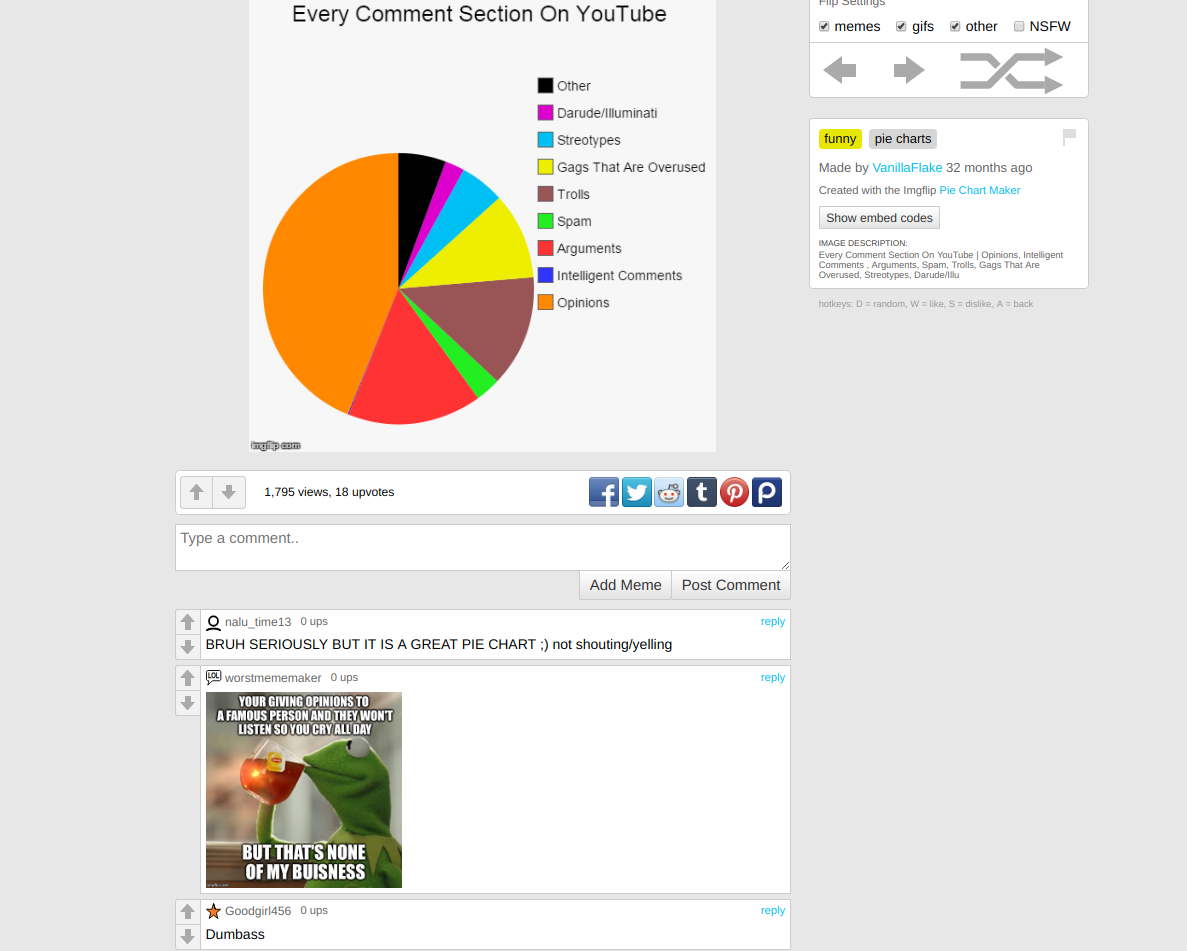

_Image courtesy : https://imgflip.com/i/huww8_

#### Or for that matter ANYONE on the internet?

 Well firstly, why not?, when freedom of speech lets you express admiration, loathing, love, hate, affection, dislike, amusement, disdain, surprise, disgust, agreement, disagreement, indifference, ambivalance, and a whole host of other un-classifiable sentiments such as "Praise to KEK!" and "Death to Kale!".
 
 Secondly, a large portion of YouTube's popularity could very well be the doing of its Chat-room like comment section, which has likely started countless wars amongst otherwise peaceful humans. Although the platform is mainly portrayed as an online video sharing website, it has been one of the leading contenders in social meida to have popularised the phrase "I just came here for the comments".

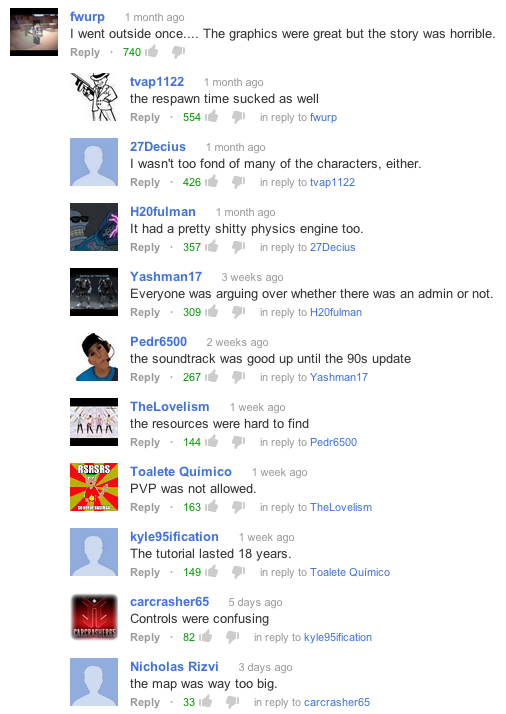
_Image courtesy : www.knowyourmeme.com _

 Thirdly, it's a great place to advertise stuff. Placing a URL to a website on a high traffic website might just get you some attention too. In 2013, a blog post addressed this issue of Google's new policy on YouTube's rising incidents of spam : https://www.grahamcluley.com/youtube-comment-spam-rise/
 
 YouTube's current policy to deal with spam involves the viewer's opinions to detect and remove spam. If a comment is marked as spam enough number of times, the comment is removed. This involves statistical calculation of what is percieved to be offensive or inappropriate by the community of viewers.

## _How to remove the noise?_

 If the above meme described your YouTube channel, you wouldn't know what to think of its performance in the outside world. "Does my channel reach people? Is my channel ranking well on the YouTube charts? Do viewers like my videos? What kind of traffic am I getting?"

 A large set of comments may not always mean high popularity, so filering out comments into one of HAM (relevant) and SPAM (irrelevant) categories can help narrow down the the analysis towards performance of your channel. 

In [1]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

The data set I am using to test my classifier module is a collection of Youtube comments marked as 1 for SPAM and 0 for HAM. Comments have been aggregated into '.cvs' files for each video that they were picked from. You can download the data from : https://archive.ics.uci.edu/ml/datasets/YouTube+Spam+Collection .

The data contains rows of comments detailing the author's name, comment ID, and date and time that comment was posted. The following dataframe is a consolidated version of comments from the five videos. It has 1956 tuples.

In [2]:
path = r'YoutubeData/' # use your path
allFiles = glob.glob(path + "/*.csv")

frame = pd.DataFrame()

list_ = []

for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=0)
    list_.append(df)
frame = pd.concat(list_)

In [15]:
frame
#frame.xs(0)

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1
5,LZQPQhLyRh9-wNRtlZDM90f1k0BrdVdJyN_YsaSwfxc,Jason Haddad,2013-11-26T02:55:11,"Hey, check out my new website!! This site is a...",1
6,z13lfzdo5vmdi1cm123te5uz2mqig1brz04,ferleck ferles,2013-11-27T21:39:24,Subscribe to my channel ﻿,1
7,z122wfnzgt30fhubn04cdn3xfx2mxzngsl40k,Bob Kanowski,2013-11-28T12:33:27,i turned it on mute as soon is i came on i jus...,0
8,z13ttt1jcraqexk2o234ghbgzxymz1zzi04,Cony,2013-11-28T16:01:47,You should check my channel for Funny VIDEOS!!﻿,1
9,z12avveb4xqiirsix04chxviiljryduwxg0,BeBe Burkey,2013-11-28T16:30:13,and u should.d check my channel and tell me wh...,1


# _What does this data represent?_

To make some plots, we need to organize the data by its indices.

In [16]:
frame['Index'] = range(0, len(frame))
frame = frame.set_index('Index')
New = frame.copy()
New = New.sample( frac =1, random_state = 5)      

New = New.iloc[np.random.permutation(len(New))]
New = New.reset_index()
del New['Index']

We will use this ordered and shuffled data frame 'New' to deal with cleaning up and classification of comments.

In [18]:
from dateutil import parser

In [19]:
DT = pd.DataFrame(New[New.DATE.notnull()])
DT = DT.reset_index(drop = True)
DT['new_col'] = DT.DATE.apply(lambda x : parser.parse(x))
DT['date'] = [d.date() for d in DT.new_col]
DT['time'] = [d.time() for d in DT.new_col]

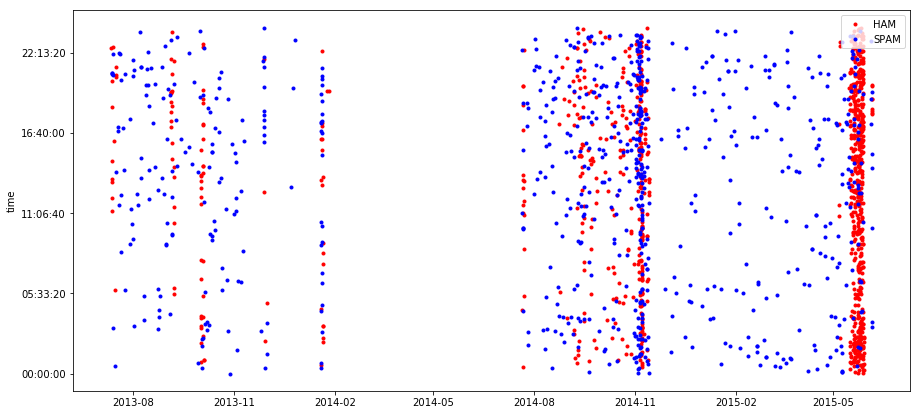

In [28]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
ax.plot(DT.date[DT.CLASS == 0], DT.time[DT.CLASS == 0], 'r.', label = 'HAM')
ax.plot(DT.date[DT.CLASS == 1], DT.time[DT.CLASS == 1], 'b.', label = 'SPAM')
ax.legend(loc="upper right")

#plt.xlim('2015-05', '2015-07')                                              #uncomment to zoom in on 2 months

#### NOTE: 
The data set comprises of comments from years 2013 to 2016, while the actual release dates of these videos is around 2010-2013.

In [32]:
d = { 'name' : ['PSY_GANGNAM', 'KATY_ROAR', 'LMFAO_PARTY', 'EMINEM_LOVELIE', 'SHAKIRA_WAKA'], 'views' : [2951311450,2269849627,1348417123,1393162453,1542731300],'release' : ['2012-07-15','2013-09-05','2011-03-08','2010-08-05','2010-06-04']}
d = pd.DataFrame(d)
d

,name,release,views
0,PSY_GANGNAM,2012-07-15,2951311450
1,KATY_ROAR,2013-09-05,2269849627
2,LMFAO_PARTY,2011-03-08,1348417123
3,EMINEM_LOVELIE,2010-08-05,1393162453
4,SHAKIRA_WAKA,2010-06-04,1542731300


The HAM comments seem to be clustered around a  certain period of time while SPAM comments have more variance around particular dates. However, closer examination of the data shows that this may not be a trend. The data set seems to have been chosen with some bias against conversations and discussions which are abundant on popular YouTube videos.

This data set represents comments expressing like / dislike for the video (HAM), or some form of advertisement (SPAM). This data may not be truly representative of all comments found on YouTube.

Also, Date-Time stamps are not a strong feature that can be used for classification.

# _How to narrow the classification of comments?_

The following modules use sci-kit learn's text feature-extraction methods CountVectorizer and TfidfVectorizer for classification. Each method is passed four classifiers, namely MultinomialNB (naive-bayes classifier), LogisticRegression, LinearSVM and RandomForestCLassifier.

In [44]:
import sklearn.feature_extraction.text as sfe
from sklearn.model_selection import KFold 
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support

### 1) CountVectorizer

In [45]:
from nltk.corpus import stopwords

In [116]:
def Count_Vectorizer_for_Classifier( classifier ) :
    matrix = []
    scores = []
    confusion = np.array([[0, 0], [0, 0]])
    
    for train, test in KFold(5).split(New) :
    
        train_data = New.iloc[train]['CONTENT'].values
        test_data = New.iloc[test]['CONTENT'].values
    
        spam_in_train = (New.iloc[train]['CLASS'] == 1)
        spam_in_test = (New.iloc[test]['CLASS'] == 1)
    
        vectorizer = sfe.CountVectorizer(stop_words = 'english')
    
        train_matrix = vectorizer.fit_transform(train_data)
        test_matrix = vectorizer.transform(test_data)
    
        classifier.fit(train_matrix, spam_in_train)
    
        predicted_spam = classifier.predict(test_matrix)
        accuracy = classifier.score(test_matrix, spam_in_test)

        precision, recall, f1, s = precision_recall_fscore_support(spam_in_test, predicted_spam)
    
        confusion = confusion_matrix(spam_in_test, predicted_spam)
        score = f1_score(spam_in_test, predicted_spam)
        scores.append(score)
        matrix.append(confusion)
    
#    print('Total comments classified:', len(New))
#    print('Score:', sum(scores)/len(scores))
#    print('Confusion matrix:')
#    print(confusion)

    return scores, sum(scores)/len(scores), matrix

In [117]:
def print_results(score, average, list_of_confusion_matrices) :
    X = pd.DataFrame([score, list_of_confusion_matrices], index = ["kFold score", "performance of model [TP, FP], [FN, TN]"], columns = ["Trial 1", "Trial 2","Trial 3","Trial 4","Trial 5",])
    print("\nAverage score of classifier our of 10 : ", average*10)
    return X

The following import the various classifiers:

In [118]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

In [119]:
classifier = MultinomialNB()
#classifier = RandomForestClassifier()
#classifier = LinearSVC()
#classifier = LogisticRegression()

####  _Uncomment the above classifiers to use with CountVectorizer_

In [120]:
SCORE, AVG, M = Count_Vectorizer_for_Classifier( classifier )

In [121]:
print_results(SCORE, AVG, M)


Average score of classifier our of 10 :  9.4392248157


,Trial 1,Trial 2,Trial 3,Trial 4,Trial 5
kFold score,0.940541,0.937656,0.953086,0.937173,0.951157
"performance of model [TP, FP], [FN, TN]","[[196, 7], [15, 174]]","[[178, 4], [21, 188]]","[[179, 3], [16, 193]]","[[188, 4], [20, 179]]","[[187, 5], [14, 185]]"


### 2) TfidfVectorizer 

In [122]:
from nltk import PorterStemmer
porter = PorterStemmer()

In [150]:
from wordcloud import WordCloud

In [164]:
def Tfidf_Vectorizer_for_Classifier( classifier ) :
    matrix = []
    scores = []
    confusion = np.array([[0, 0], [0, 0]])
    for train, test in KFold(5).split(New) :
    
        train_data = New.iloc[train]['CONTENT'].values
        test_data = New.iloc[test]['CONTENT'].values
    
        train_data = [" ".join([porter.stem(word) for word in sentence.split(" ")]) for sentence in train_data]
        test_data = [" ".join([porter.stem(word) for word in sentence.split(" ")]) for sentence in test_data]
        
        spam_in_train = (New.iloc[train]['CLASS'] == 1)
        spam_in_test = (New.iloc[test]['CLASS'] == 1)
    
        vectorizer = sfe.TfidfVectorizer()
    
        train_matrix = vectorizer.fit_transform(train_data)
        test_matrix = vectorizer.transform(test_data) 

        classifier.fit(train_matrix, spam_in_train)

        predicted_spam = classifier.predict(test_matrix)
        accuracy = classifier.score(test_matrix, spam_in_test)

        precision, recall, f1, s = precision_recall_fscore_support(spam_in_test, predicted_spam)
    
        confusion = confusion_matrix(spam_in_test, predicted_spam)
        score = f1_score(spam_in_test, predicted_spam)
        scores.append(score)
        matrix.append(confusion)

    return scores, sum(scores)/len(scores), matrix, train_data

In [165]:
classifier = MultinomialNB()
#classifier = RandomForestClassifier()
#classifier = LinearSVC()
#classifier = LogisticRegression()

#### _Uncomment the above classifiers to use with TfidfVectorizer_

In [166]:
SCORE, AVG, M , wordCLOUD= Tfidf_Vectorizer_for_Classifier( classifier )

In [167]:
print_results(SCORE, AVG, M)


Average score of classifier our of 10 :  9.40902631187


,Trial 1,Trial 2,Trial 3,Trial 4,Trial 5
kFold score,0.93956,0.94,0.956098,0.918206,0.950649
"performance of model [TP, FP], [FN, TN]","[[199, 4], [18, 171]]","[[179, 3], [21, 188]]","[[177, 5], [13, 196]]","[[186, 6], [25, 174]]","[[189, 3], [16, 183]]"


The following cloud shows the stemmed words present in the last training set of the KFold split.

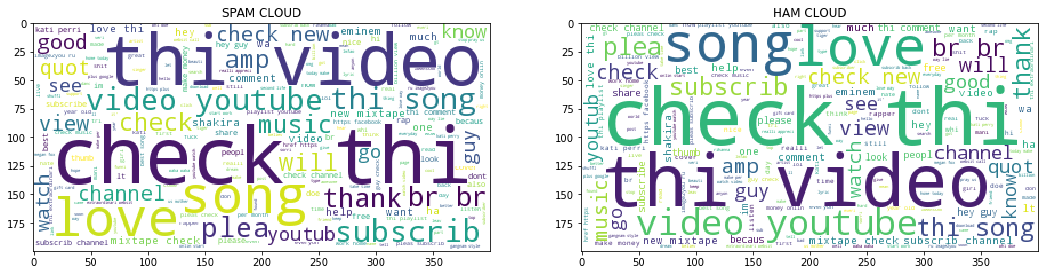

In [177]:
spamwords = ' '.join(wordCLOUD)
spamcloud = WordCloud(background_color = 'white').generate(spamwords)
hamwords = ' '.join(wordCLOUD)
hamcloud =  WordCloud(background_color = 'white').generate(hamwords)
figure, (ax1, ax2) = plt.subplots( nrows = 1, ncols = 2, figsize = (18, 10))
ax1.imshow(spamcloud)
ax1.set_title("SPAM CLOUD")
ax2.imshow(hamcloud)
ax2.set_title("HAM CLOUD")

# _Conclusions_

The above modules produce an average 93% accuracy in classification of SPAM and HAM, given that the data resebles data in this particular set